In [1]:
from ecoevocrm.consumer_resource_system import *
import ecoevocrm.utils as utils
import ecoevocrm.viz as viz
import ecoevocrm.coarse_graining as cg

In [2]:
import matplotlib.pyplot as plt

In [3]:
import cProfile
import pstats

--------

### Set the number of resources

In [4]:
L = 10

### Define the ancestral phenotype (traits vector)

In [5]:
anc_phenotype = utils.random_matrix(shape=(10, L), mode='binomial')

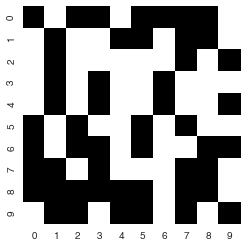

In [6]:
viz.matrix_plot(anc_phenotype)

### Define the system biochemistry (trait/resource interactions)

In [7]:
J = utils.random_matrix((L, L), 'tikhonov_sigmoid')

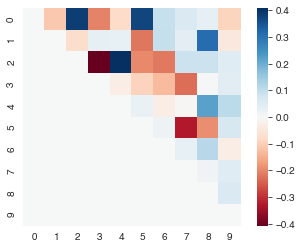

In [8]:
viz.matrix_plot(J)

### Parameterize and instantiate the Consumer-Resource System

In [9]:
anc_system = ConsumerResourceSystem(sigma=anc_phenotype, 
                                    b=1, k=1e10, c=0.1, chi=0.5, J=J, mu=1e-10,
                                    resource_consumption_mode='fast_resource_eq',
                                    threshold_min_rel_abundance=1e-6,
                                    N_init=1, R_init=1)

typeset here
typeset here
typeset here2
typeset here2


### Simulate dynamics

In [10]:
# anc_system.run(T=1000)

In [11]:
profile = cProfile.Profile()
profile.runcall(anc_system.run)

NameError: name 'exit' is not defined

In [13]:
ps = pstats.Stats(profile)
ps.sort_stats('ncalls')
ps.print_stats()

         5621069 function calls (5309026 primitive calls) in 7.001 seconds

   Ordered by: call count

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  1000007    0.160    0.000    0.199    0.000 {built-in method builtins.isinstance}
153218/27073    0.164    0.000    0.250    0.000 /usr/local/lib/python3.8/site-packages/numba/core/ir.py:313(_rec_list_vars)
147086/146841    0.045    0.000    0.100    0.000 {built-in method builtins.getattr}
126100/60276    0.112    0.000    0.377    0.000 {method 'format' of 'str' objects}
   124106    0.018    0.000    0.018    0.000 {method 'append' of 'list' objects}
   123260    0.015    0.000    0.015    0.000 {method 'extend' of 'list' objects}
   103979    0.019    0.000    0.036    0.000 {method 'get' of 'dict' objects}
98580/94630    0.015    0.000    0.017    0.000 {built-in method builtins.len}
    72771    0.011    0.000    0.011    0.000 /usr/local/lib/python3.8/site-packages/numba/core/targetconfig.py:38(default)
7

### Visualize results

In [ ]:
type_colors = viz.color_types_by_phylogeny(anc_system.type_set, apply_palette_depth=0)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
viz.stacked_abundance_plot(anc_system, ax=ax, type_colors=type_colors)

In [ ]:
viz.Lstar_types_plot(anc_system)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(3, 12))
viz.matrix_plot(anc_system.get_extant_type_set().sigma, ax=ax)